# Two layer perceptron 3.2

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math

from sklearn.model_selection import train_test_split

In [130]:
#Won't be implemented for now
class layer():
    def __init__(self,nrOfNeurons, nrOfInputs):
        #self.w
        #self.h_in
        pass

In [131]:
class neuralNet():
    def __init__(self,nr1,nr2):
        self.trainAbsErrors = [] #Storing error in each epoch to plot learning curve
        self.trainMseErrors = []
        self.testAbsErrors = []
        self.testMseErrors = []
        
        self.finalW = [] #Store weights when training is done
        
        self.nrOfNodes_layer1 = nr1
        self.nrOfNodes_layer2 = nr2
    
    def initWeights(self,nrOfNeuronsInLayer,nrOfInputsPerNeuron):
        #Need to add one one weight for bias term
        w = np.random.normal(0,1,size=(nrOfInputsPerNeuron+1,nrOfNeuronsInLayer))
        return w
    
    #Introduces non-linearity
    def transferFunc(self,x):
        transformed = 2/(1+np.exp(-x))-1
        return transformed

    def transferDerivative(self, x):
        derivative = np.multiply((1+x),(1-x))/2
        return derivative
    
    def predict(self,patterns):
        pass
        
    def forwardPass(self,patterns,w_1,w_2,bias):
        patterns = np.column_stack([patterns,bias])
        
        h_in = np.dot(patterns,w_1) #hin = w_1*[patterns + bias] (transposed)            
        h_out = np.column_stack([self.transferFunc(h_in),bias]) #hout = [transferFunc(hin)+bias]    
        o_in = np.dot(h_out,w_2) #oin = w_2 * hout (transposed)
        o_out = self.transferFunc(o_in) #out = transferFunc(oin)
        
        return h_out,o_out
    
    def backPropagation(self,targets,h_out,o_out,w_2):
        targets = targets.reshape(len(targets),1)        
        delta_o = np.multiply((o_out-targets),self.transferDerivative(o_out))    
        delta_h = np.dot(delta_o,w_2.T)*self.transferDerivative(h_out)
        delta_h = delta_h[:,:self.nrOfNodes_layer1]
        return delta_h,delta_o
        
    def calcError(self,predictions,y,epochNr,traintest):
        #Implementera mean square error 
        absError = 0
        squared_e = 0
        for i in range(len(y)):
            squared_e+=math.pow((predictions[i][0]-y[i]),2)
            if predictions[i][0]>0:
                threshold_pred=1
            else:
                threshold_pred=-1

            #If prediction is false, increment error
            if(threshold_pred!=y[i]):
                    absError+=1
        
        absErrorRatio=absError/len(y)
        mse = squared_e/len(y)            
        #print("Nr of errors in",traintest,"data during epoch",epochNr,":",absError)
        
        return [absErrorRatio,mse]
    
    def train_batch(self,X,y,X_t,y_t,epochs, xx, yy, plot, test):
        w_1 = self.initWeights(self.nrOfNodes_layer1,2) #Weights for first layer
        w_2 = self.initWeights(self.nrOfNodes_layer2,self.nrOfNodes_layer1) #Weights for second layer
        dw_1 = 0
        dw_2 = 0
        
        bias = np.ones(len(X),dtype=int)
        
        for epoch in range(epochs):
            
            #Forward pass
            h_out,o_out = self.forwardPass(X,w_1,w_2,bias)

            #backPropagation
            delta_h,delta_o = self.backPropagation(y,h_out,o_out,w_2)
            
            #updateWeights
            alpha=0.9
            eta=0.001
            
            #dw_1 = np.multiply(dw_1,alpha)-np.dot(X.T,delta_h)*(1-alpha)
            dw_1 = np.multiply(dw_1,alpha)-np.dot(np.column_stack([X,bias]).T,delta_h)*(1-alpha)
            dw_2 = np.multiply(dw_2,alpha)-np.dot(h_out.T,delta_o)*(1-alpha)
            
            w_1 = w_1 + dw_1*eta
            w_2 = w_2 + dw_2*eta
            
            #Make a prediction on training data with the current weights
            _,predictions_train = self.forwardPass(X,w_1,w_2,bias)
            if plot and epoch%5==0:
                print(epoch)
                self.plotGaussFunc(predictions_train, xx, yy)
            train_abs, train_mse = self.calcError(predictions_train,y,epoch,"train")
            self.trainAbsErrors.append(train_abs)
            self.trainMseErrors.append(train_mse)
            if test:
                #Make a prediction on testing data with the current weights
                test_bias = np.ones(len(X_t),dtype=int) #Need other dimensions
                _,predictions_test = self.forwardPass(X_t,w_1,w_2,test_bias) #calc error on testdata as well

                test_abs, test_mse = self.calcError(predictions_test,y_t,epoch,"test")
                self.testAbsErrors.append(test_abs)
                self.testMseErrors.append(test_mse)
            
        
        self.finalW = [w_1,w_2]
        #self.plotDecBoundary(X_test,y_test,w_1,w_2,test_bias)
            
        
    
    def evaluate(self,epochs):
        f, axarr = plt.subplots()
        
        axarr.plot(range(epochs),self.trainMseErrors, 'o')
        axarr.plot(range(epochs),self.testMseErrors, 'x')
        axarr.set_title('Mean squared error o=train, x=test')
        
        plt.grid()
        plt.show()
        
        
    def printErrors(self):
        print("Final MSE:",self.testMseErrors[len(self.testMseErrors)-1])  
    
    def plotGaussFunc(self, prediction, xx, yy):
        print(prediction.shape)
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        prediction = np.reshape(prediction, (21,21))

        # Plot the surface.
        surf = ax.plot_surface(xx, yy, prediction, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        # Customize the z axis.
        ax.set_zlim(-0.5, 0.5)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        plt.show()


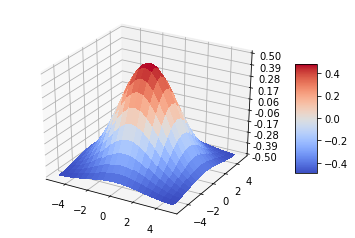

Patterns
[[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.
  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.
  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
   4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
   1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2.5
  -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.
  -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.
  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.
  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
   4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
   1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  -5.  -4.5 -4.  -3.5 -3.  -2

In [132]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5.5, 0.5)
Y = np.arange(-5, 5.5, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-X*X*0.1) * np.exp(-Y*Y*0.1) - 0.5


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.5, 0.5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

targets = np.reshape(Z, (21*21))
patterns = np.stack((np.reshape(X, (21*21)), np.reshape(Y, (21*21))))
print("Patterns")
print(patterns)
print("Targets")
print(targets)

print(targets.shape)
print(patterns.shape)



0
(441, 1)


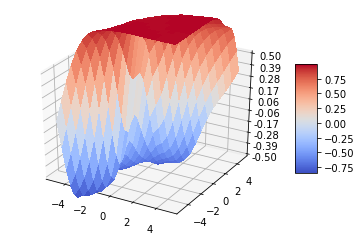

5
(441, 1)


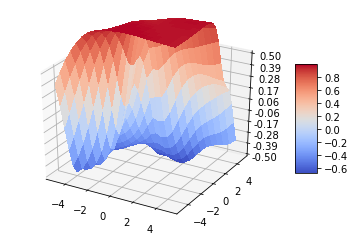

10
(441, 1)


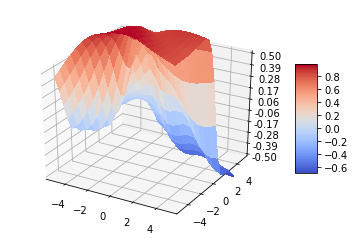

15
(441, 1)


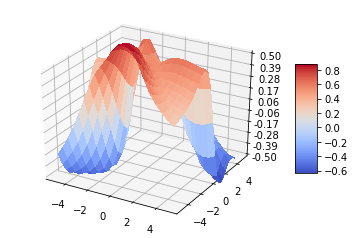

20
(441, 1)


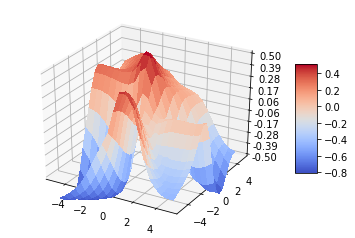

25
(441, 1)


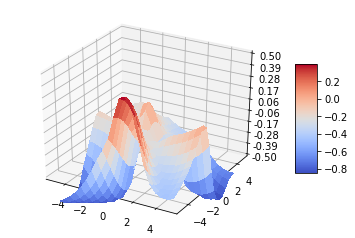

30
(441, 1)


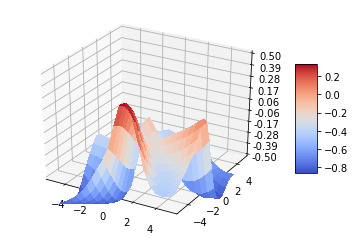

35
(441, 1)


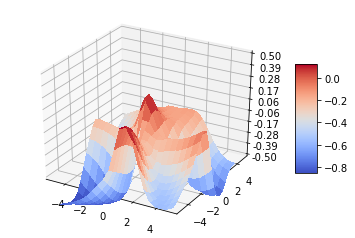

40
(441, 1)


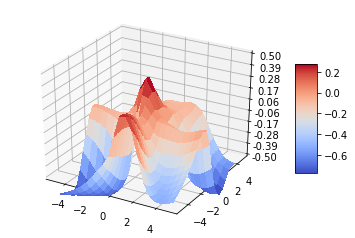

45
(441, 1)


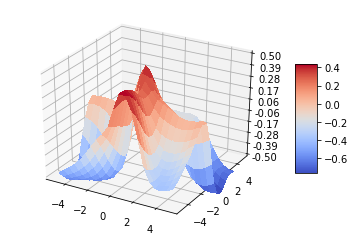

50
(441, 1)


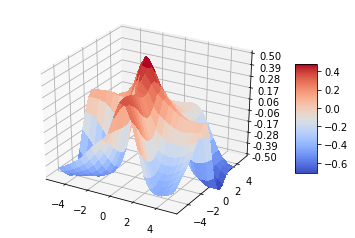

55
(441, 1)


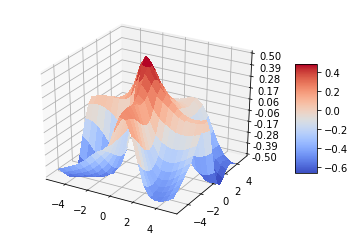

60
(441, 1)


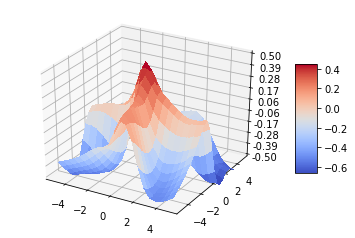

65
(441, 1)


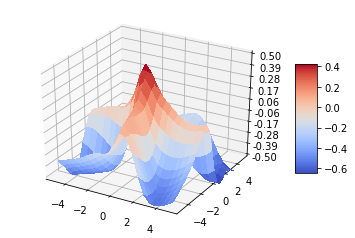

70
(441, 1)


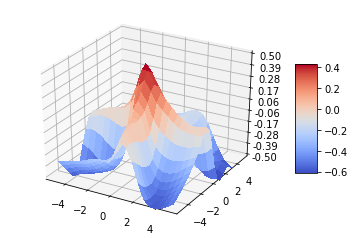

75
(441, 1)


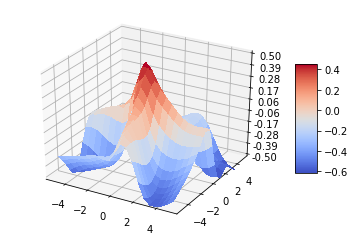

80
(441, 1)


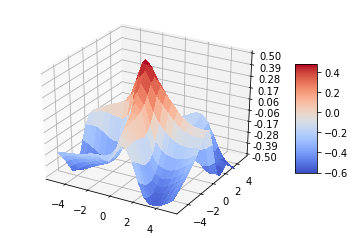

85
(441, 1)


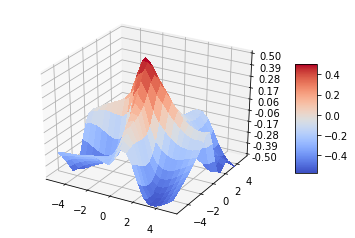

90
(441, 1)


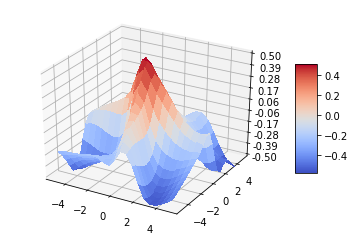

95
(441, 1)


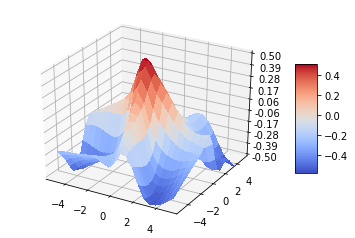

In [137]:
nodesInFirstLayer=32
nodesInSecondLayer=1
epochs = 100

nn = neuralNet(nodesInFirstLayer,nodesInSecondLayer) 
nn.train_batch(patterns.T,targets,[], [],epochs,X,Y, True, False)

In [134]:
def generalize(n, patterns, targets):
    all_samples = np.column_stack([patterns.T,targets])
    np.random.shuffle(all_samples)
    train = all_samples[:n]
    test = all_samples[n:]
    
    patterns_train = np.stack((train[:,0], train[:,1]))
    patterns_test = np.stack((test[:,0], test[:,1]))
    
    targets_train = train[:,2]
    targets_test = test[:,2]
    
    nodesInFirstLayer=32
    nodesInSecondLayer=1
    epochs = 100

    nn = neuralNet(nodesInFirstLayer,nodesInSecondLayer) 
    nn.train_batch(patterns_train.T,targets_train,patterns_test.T,targets_test,epochs,X,Y, False, True)
    nn.evaluate(epochs)
    nn.printErrors()
    


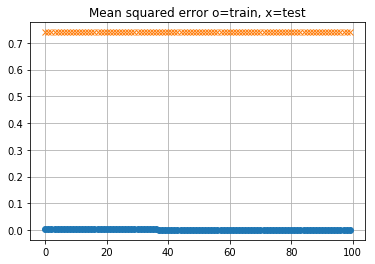

Final MSE: 0.7389194127568938


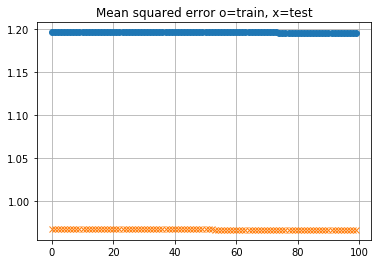

Final MSE: 0.9663882530361542


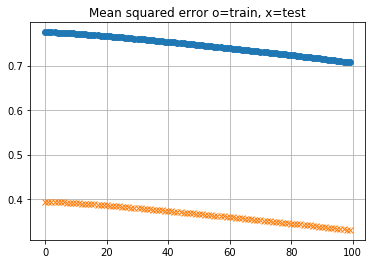

Final MSE: 0.3309222372082007


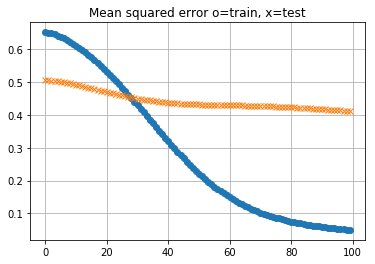

Final MSE: 0.4120788670802304


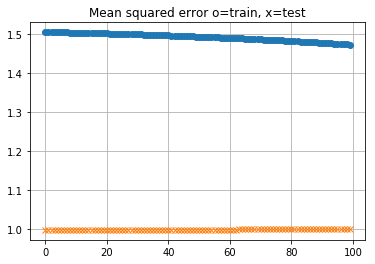

Final MSE: 0.9993609411267085


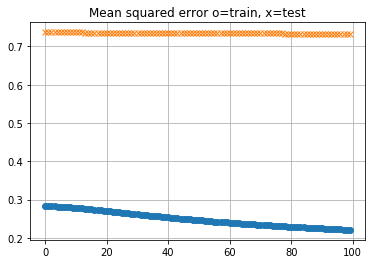

Final MSE: 0.731277895842403


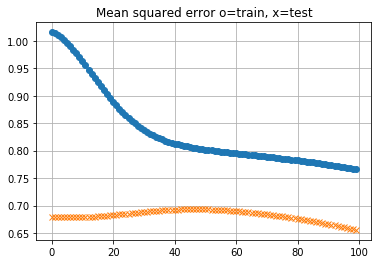

Final MSE: 0.6557808837013878


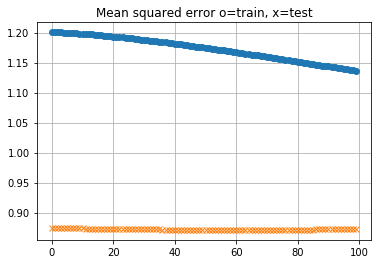

Final MSE: 0.8725511874612877


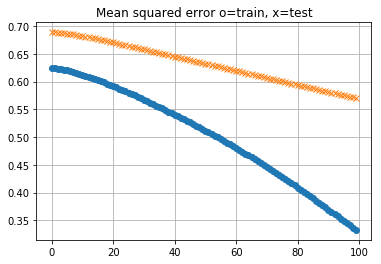

Final MSE: 0.5708662804377934


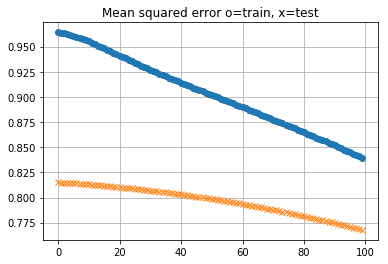

Final MSE: 0.7677795924495698


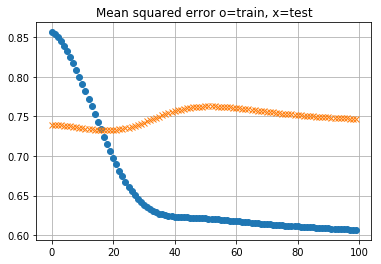

Final MSE: 0.7468922508699206


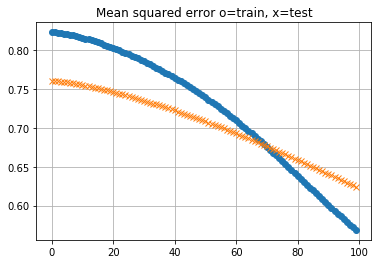

Final MSE: 0.6243519710961524


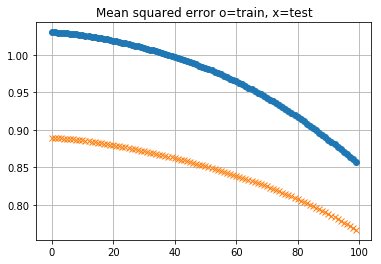

Final MSE: 0.7667148544030752


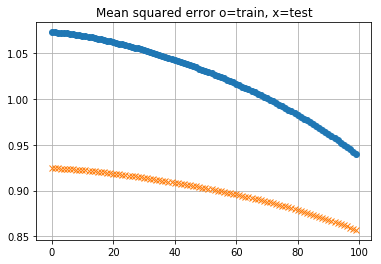

Final MSE: 0.8570675517304107


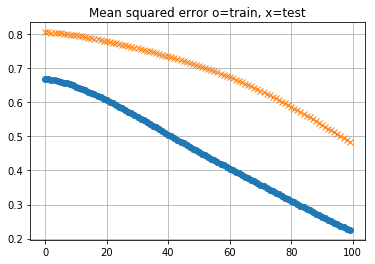

Final MSE: 0.484422264454408


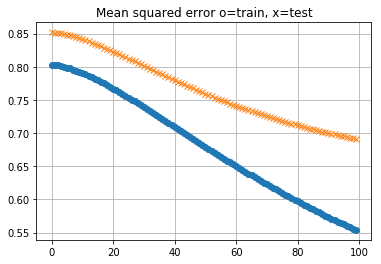

Final MSE: 0.6910723346331453


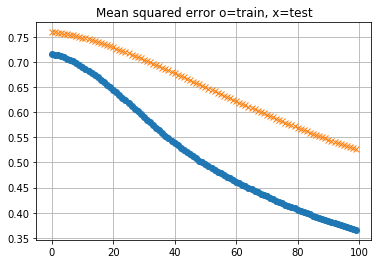

Final MSE: 0.52656677029019


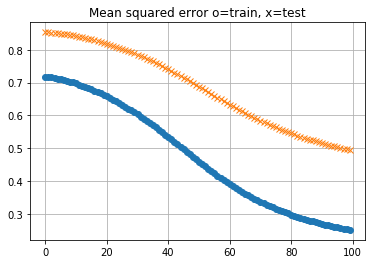

Final MSE: 0.4945293661631217


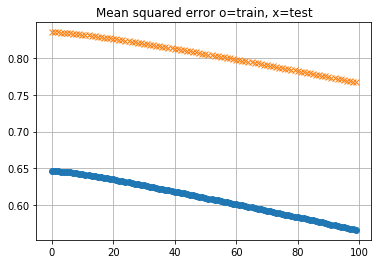

Final MSE: 0.7669108694155221


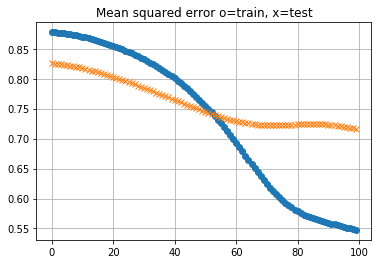

Final MSE: 0.7157649871609085


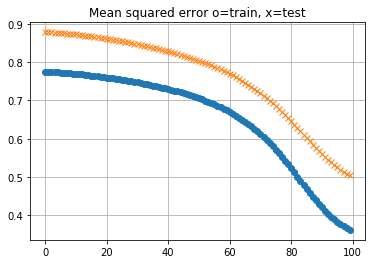

Final MSE: 0.5044942955659333


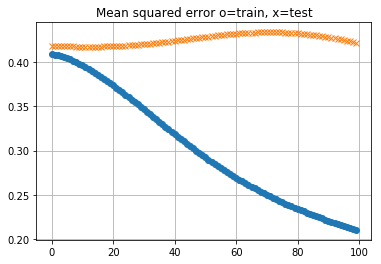

Final MSE: 0.4220532364726476


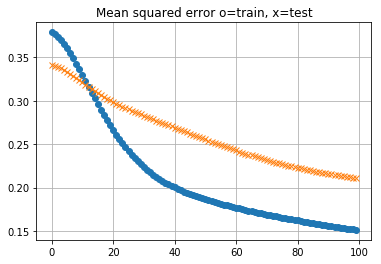

Final MSE: 0.21056614391093764


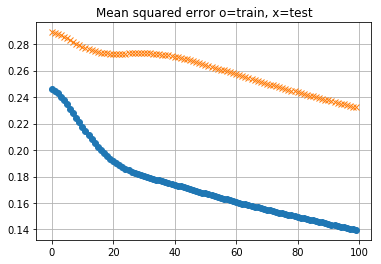

Final MSE: 0.2321683727899214


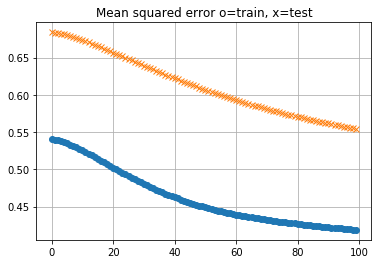

Final MSE: 0.5541758218119256


In [135]:
for n in range(1,26):
    generalize(n, patterns, targets)